# XG Boost Modelling


In [29]:
# imports
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score
from joblib import dump, load


In [30]:
# to read the dataset
xg_df = pd.read_csv("Set B Corporate Rating - marketvalue3classes.csv") #load dataset
xg_df # to call/display dataset

,Total Asset,Cash,Total Debt in Current Liabilities,Total Long-Term Debt,Earnings Before Interest,Gross Profit (Loss),Total Liabilities,Retained Earnings,Total debt/total asset,Total asset/Total libiilities,...,Total Revenue,Operating Activities - Net Cash Flow,Financing Activities - Net Cash Flow,Net Cash Flow,Rating Level,Debt-to-Equity Ratio,Total Current Asset,Working Capital Ratio,Debt Service Coverage Ratio,Gross Profit Margin
0,43771.000,994.000,1708.00,16196.000,6585.000,13139.000,41750.000,-13121.000,0.370017,1.048407,...,42650.000,3080.000,-315.000,2765.000,High Risk,0.845126,1998.000,0.137907,0.367795,30.806565
1,14313.532,7.604,530.97,3031.215,1228.600,1228.600,9794.430,1857.924,0.211773,1.461395,...,3491.632,1099.627,-178.881,920.746,Low Risk,0.117495,263.590,0.105426,0.344901,35.186984
2,41275.000,4063.000,4437.00,3408.000,4475.000,12088.000,19636.000,17821.000,0.082568,2.102007,...,20247.000,3675.000,-2742.000,933.000,Low Risk,0.205046,6706.000,-6.517007,0.570427,59.702672
3,53402.100,1420.400,729.30,7852.000,4848.700,15091.500,38850.300,9940.400,0.147035,1.374561,...,58003.200,3372.800,-1235.000,2137.800,Low Risk,0.050118,1420.400,0.199419,0.565031,26.018392
4,17779.100,336.600,1294.00,4824.500,2560.600,3761.300,9970.500,8751.300,0.271358,1.783170,...,10439.000,2187.100,-661.400,1525.700,Low Risk,0.172042,1198.000,0.339329,0.418501,36.031229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,441.952,83.355,0.00,221.082,33.838,181.642,514.066,-111.801,0.500240,0.859718,...,687.969,7.631,1.732,9.363,High Risk,-0.000000,140.403,0.635072,0.153056,26.402643
2582,6152.800,3961.400,0.00,997.600,704.000,2147.700,4152.700,1452.800,0.162138,1.481638,...,14237.100,748.300,833.100,1581.400,Moderate Risk,0.000000,3961.400,3.970930,0.705694,15.085235
2583,1364.696,73.534,0.00,502.539,297.495,451.277,907.761,145.521,0.368242,1.503365,...,1265.364,270.275,-78.942,191.333,Moderate Risk,0.000000,86.061,0.171252,0.591984,35.663809
2584,45547.000,5017.000,10279.00,14997.000,2003.000,5125.000,41075.000,20.000,0.329264,1.108874,...,23669.000,2108.000,-1538.000,570.000,Moderate Risk,2.309369,10626.000,2.252226,0.079245,21.652795


In [31]:
# Step 2: Column Filter Node - remove unnecessary columns (axis=1 removes columns)
xg_df= xg_df.drop(
    # columns to remove here
    ['Total Revenue'],  
    axis=1, 
    errors='ignore'  # Prevent errors if the column is not present
)
xg_df  # Display the filtered dataframe

,Total Asset,Cash,Total Debt in Current Liabilities,Total Long-Term Debt,Earnings Before Interest,Gross Profit (Loss),Total Liabilities,Retained Earnings,Total debt/total asset,Total asset/Total libiilities,...,Total Inventories,Operating Activities - Net Cash Flow,Financing Activities - Net Cash Flow,Net Cash Flow,Rating Level,Debt-to-Equity Ratio,Total Current Asset,Working Capital Ratio,Debt Service Coverage Ratio,Gross Profit Margin
0,43771.000,994.000,1708.00,16196.000,6585.000,13139.000,41750.000,-13121.000,0.370017,1.048407,...,1004.000,3080.000,-315.000,2765.000,High Risk,0.845126,1998.000,0.137907,0.367795,30.806565
1,14313.532,7.604,530.97,3031.215,1228.600,1228.600,9794.430,1857.924,0.211773,1.461395,...,255.986,1099.627,-178.881,920.746,Low Risk,0.117495,263.590,0.105426,0.344901,35.186984
2,41275.000,4063.000,4437.00,3408.000,4475.000,12088.000,19636.000,17821.000,0.082568,2.102007,...,2643.000,3675.000,-2742.000,933.000,Low Risk,0.205046,6706.000,-6.517007,0.570427,59.702672
3,53402.100,1420.400,729.30,7852.000,4848.700,15091.500,38850.300,9940.400,0.147035,1.374561,...,0.000,3372.800,-1235.000,2137.800,Low Risk,0.050118,1420.400,0.199419,0.565031,26.018392
4,17779.100,336.600,1294.00,4824.500,2560.600,3761.300,9970.500,8751.300,0.271358,1.783170,...,861.400,2187.100,-661.400,1525.700,Low Risk,0.172042,1198.000,0.339329,0.418501,36.031229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,441.952,83.355,0.00,221.082,33.838,181.642,514.066,-111.801,0.500240,0.859718,...,57.048,7.631,1.732,9.363,High Risk,-0.000000,140.403,0.635072,0.153056,26.402643
2582,6152.800,3961.400,0.00,997.600,704.000,2147.700,4152.700,1452.800,0.162138,1.481638,...,0.000,748.300,833.100,1581.400,Moderate Risk,0.000000,3961.400,3.970930,0.705694,15.085235
2583,1364.696,73.534,0.00,502.539,297.495,451.277,907.761,145.521,0.368242,1.503365,...,12.527,270.275,-78.942,191.333,Moderate Risk,0.000000,86.061,0.171252,0.591984,35.663809
2584,45547.000,5017.000,10279.00,14997.000,2003.000,5125.000,41075.000,20.000,0.329264,1.108874,...,5609.000,2108.000,-1538.000,570.000,Moderate Risk,2.309369,10626.000,2.252226,0.079245,21.652795


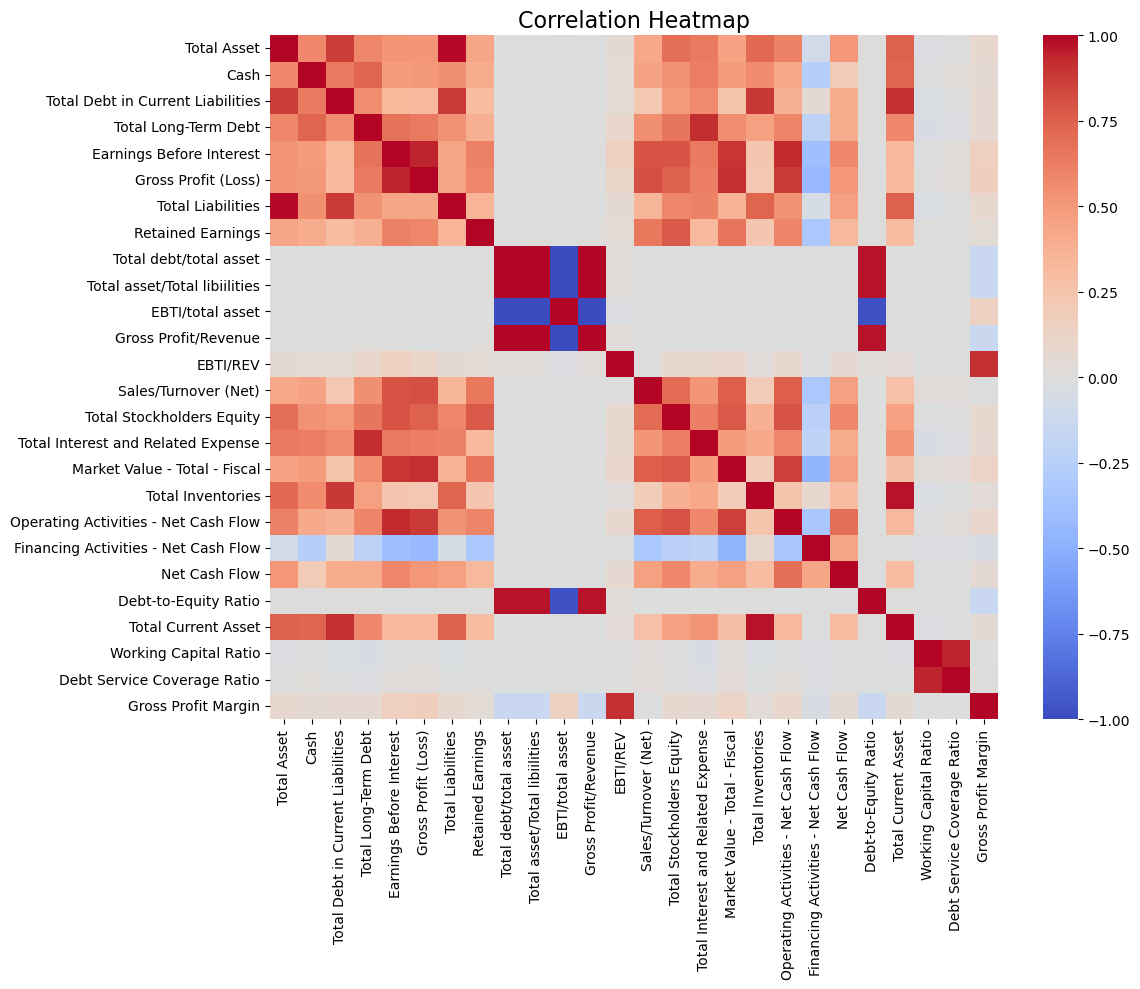

In [32]:
#linear correlation

numeric_data = xg_df.select_dtypes(include=[np.number])  # Select only numeric columns

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=False,  cmap='coolwarm',  vmin=-1, vmax=1) 
# annot = false Do not display correlation values in the cells | vmin=-1, vmax=1 = Set correlation range

# Customize the plot
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust spacing

plt.show() # Show the heatmap

In [33]:
# Define the feature matrix by dropping the target column
X_filtered = xg_df.drop(columns=['Rating Level'])

# Define the target variable
y = xg_df['Rating Level']

In [34]:
# encode the target lables
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [35]:
# Save the LabelEncoder for reuse
dump(label_encoder, 'joblib/label_encoder.joblib')  # Save LabelEncoder in the 'joblib' folder

['joblib/label_encoder.joblib']

In [36]:
# parameter optimization loop
# Define the range for sigma
sigma_values = np.arange(0.3, 0.6 + 0.1, 0.1)  # Start, Stop (inclusive), Step
print("Sigma values to evaluate:", sigma_values)

Sigma values to evaluate: [0.3 0.4 0.5 0.6]


In [37]:
# Parameter Optimization with GridSearchCV 
# Define parameter grid for optimization
param_grid = {
    'max_depth': [3, 5, 7],          # Tree depth
    'learning_rate': [0.1, 0.2, 0.3],  # Learning rate (eta)
    'n_estimators': [50, 100, 150],   # Number of trees
    'subsample': [0.8, 1.0],          # Subsample ratio
    'colsample_bytree': [0.8, 1.0]    # Column subsample ratio
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42),  #Base model
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Optimize accuracy
    verbose=1,  # Display progress
    n_jobs=-1  # Use all available CPU cores
)

print("Running Grid Search...")  # Inform user of progress
grid_search.fit(X_filtered, y_encoded)  # Run GridSearchCV

# Display best parameters and score
print("\nBest Parameters:", grid_search.best_params_)  #Show best parameters
print("Best Score (Accuracy):", grid_search.best_score_)  #Show best accuracy

Running Grid Search...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
Best Score (Accuracy): 0.894823865036631


In [38]:
# Train Final Model with Best Parameters 
# Retrieve the best parameters
best_params = grid_search.best_params_

In [39]:
# Initialize model with best parameters
best_model = XGBClassifier(**best_params, random_state=42)
best_model.fit(X_filtered, y_encoded)  # Train final model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [40]:
import os

# Ensure the 'joblib' directory exists
os.makedirs('joblib', exist_ok=True)  # Create the 'joblib' folder if it doesn't exist

# Save the trained model
dump(best_model, 'joblib/credit_risk_model.joblib')  # Save the model in the 'joblib' folder

['joblib/credit_risk_model.joblib']


Feature Importance:
                                 Feature  Importance
16         Market Value - Total - Fiscal    0.153206
7                      Retained Earnings    0.130327
24           Debt Service Coverage Ratio    0.055183
4               Earnings Before Interest    0.049446
13                  Sales/Turnover (Net)    0.037202
15    Total Interest and Related Expense    0.034718
8                 Total debt/total asset    0.033932
12                              EBTI/REV    0.032224
23                 Working Capital Ratio    0.031973
14             Total Stockholders Equity    0.031833
18  Operating Activities - Net Cash Flow    0.031281
5                    Gross Profit (Loss)    0.029755
6                      Total Liabilities    0.029640
0                            Total Asset    0.029437
9          Total asset/Total libiilities    0.027685
2      Total Debt in Current Liabilities    0.027517
3                   Total Long-Term Debt    0.027477
1                        

C:\Users\Charenya\AppData\Local\Temp\ipykernel_20276\1311283841.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='coolwarm')


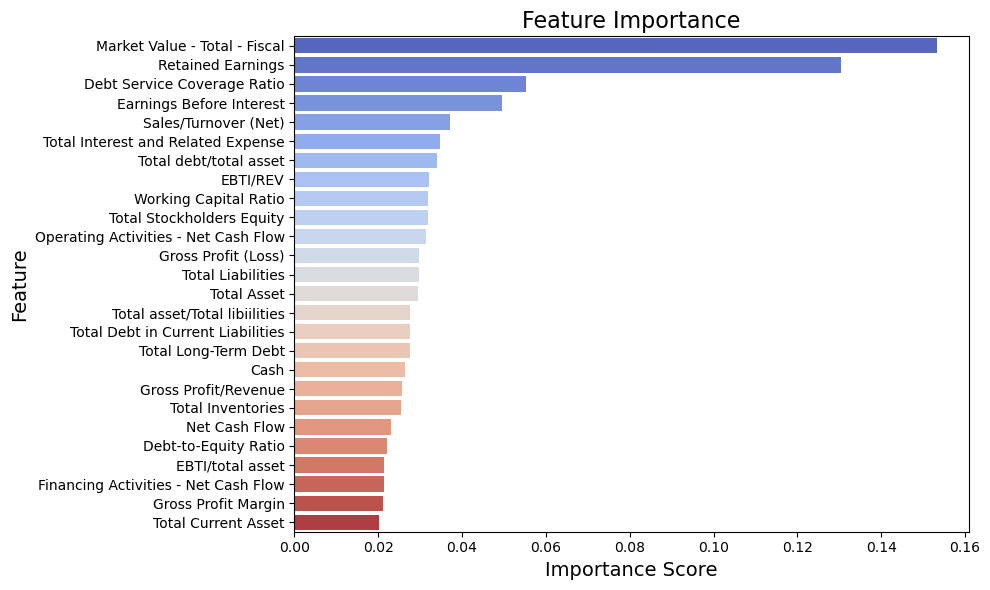

In [41]:
# Feature Importance Analysis 
# Retrieve and plot feature importance
importance = best_model.feature_importances_
feature_names = X_filtered.columns

# Sort by importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='coolwarm')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()


Confusion Matrix:
[[ 429    0  121]
 [   2  301  105]
 [  51   44 1533]]

Confusion Matrix (Percentages):
[[78.    0.   22.  ]
 [ 0.49 73.77 25.74]
 [ 3.13  2.7  94.16]]


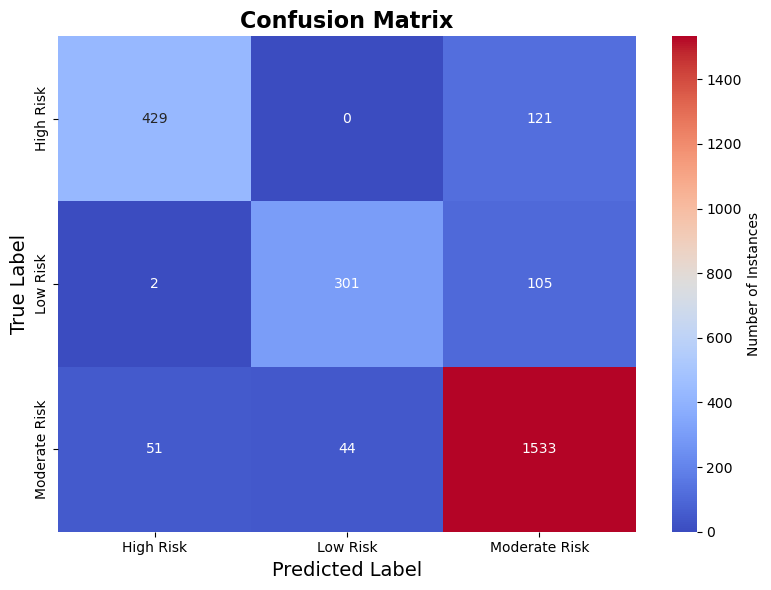


Classification Report:
               precision    recall  f1-score   support

    High Risk       0.89      0.78      0.83       550
     Low Risk       0.87      0.74      0.80       408
Moderate Risk       0.87      0.94      0.91      1628

     accuracy                           0.88      2586
    macro avg       0.88      0.82      0.85      2586
 weighted avg       0.88      0.88      0.87      2586


Aggregated Overall Accuracy: 87.51%
Cohen's Kappa: 0.756
Correctly Classified: 2263
Incorrectly Classified: 323


In [42]:
# Cross-validation with the best model
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

all_y_test = []
all_y_test_pred = []

# Perform cross-validation
for train_index, test_index in skf.split(X_filtered, y_encoded):
    X_train, X_test = X_filtered.iloc[train_index], X_filtered.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Initialize a fresh instance of the best model
    fold_model = XGBClassifier(**best_params, random_state=42)
    fold_model.fit(X_train, y_train)  # Train on the current fold

    # Predict using the fold-specific model
    y_test_pred = fold_model.predict(X_test)
    all_y_test.extend(y_test)
    all_y_test_pred.extend(y_test_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(all_y_test, all_y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Confusion Matrix Percentages
conf_matrix_percentages = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
print("\nConfusion Matrix (Percentages):")
print(np.round(conf_matrix_percentages, 2))

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True,         
            fmt='d',            
            cmap='coolwarm',     
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Number of Instances'})  
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(all_y_test, all_y_test_pred, target_names=label_encoder.classes_))

# Overall Accuracy
overall_accuracy = accuracy_score(all_y_test, all_y_test_pred)
print(f"\nAggregated Overall Accuracy: {overall_accuracy:.2%}")

# Cohen's Kappa 
kappa = cohen_kappa_score(all_y_test, all_y_test_pred)
print(f"Cohen's Kappa: {kappa:.3f}")

# Correctly and Incorrectly Classified Counts 
correctly_classified = sum(np.array(all_y_test) == np.array(all_y_test_pred))
incorrectly_classified = len(all_y_test) - correctly_classified
print(f"Correctly Classified: {correctly_classified}")
print(f"Incorrectly Classified: {incorrectly_classified}")


In [43]:
#capture workflow start node: 

# Save the current state of the partitioned data before predictions
captured_data = X_train.copy()

In [44]:
from joblib import load

# Load the pre-trained XGBoost model
model = load('joblib/credit_risk_model.joblib')  # Update the path as needed

# Now proceed with predictions
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)

In [45]:
#capture worflow end node

import pandas as pd

# Combine test data, predictions, and probabilities
final_data = pd.DataFrame(X_test.copy())
final_data['Predictions'] = predictions
final_data['Probabilities'] = [prob[1] for prob in probabilities]  # Assuming binary classification

# Ensure the output shape matches the expected 69 rows and 28 columns
print(f"Final output data shape: {final_data.shape}")  # Should be (69, 28)


final_data

Final output data shape: (517, 28)


,Total Asset,Cash,Total Debt in Current Liabilities,Total Long-Term Debt,Earnings Before Interest,Gross Profit (Loss),Total Liabilities,Retained Earnings,Total debt/total asset,Total asset/Total libiilities,...,Operating Activities - Net Cash Flow,Financing Activities - Net Cash Flow,Net Cash Flow,Debt-to-Equity Ratio,Total Current Asset,Working Capital Ratio,Debt Service Coverage Ratio,Gross Profit Margin,Predictions,Probabilities
1,14313.532,7.604,530.970,3031.215,1228.600,1228.600,9794.430,1857.924,0.211773,1.461395,...,1099.627,-178.881,920.746,0.117495,263.590,0.105426,0.344901,35.186984,1,0.989628
3,53402.100,1420.400,729.300,7852.000,4848.700,15091.500,38850.300,9940.400,0.147035,1.374561,...,3372.800,-1235.000,2137.800,0.050118,1420.400,0.199419,0.565031,26.018392,1,0.992754
8,59633.000,163.000,3960.000,16622.000,5216.000,5216.000,42809.000,7303.000,0.278738,1.393001,...,4613.000,-162.000,4451.000,0.235378,1488.000,0.117517,0.253425,30.646298,2,0.002435
13,11879.942,501.149,6.190,4348.859,1740.519,2299.133,6961.153,3650.694,0.366067,1.706606,...,1781.911,69.848,1851.759,0.001258,731.216,0.168379,0.399655,33.789924,2,0.000954
15,231839.000,13844.000,6308.000,28987.000,60449.000,78483.000,120292.000,88234.000,0.125031,1.927302,...,59713.000,-37549.000,22164.000,0.056550,15955.000,0.703514,1.712679,42.934982,1,0.999673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2570,1188.551,332.977,7.203,576.345,112.561,332.269,725.767,-88.449,0.484914,1.637648,...,79.232,227.354,306.586,0.015564,447.912,0.786995,0.192891,61.040934,0,0.000050
2577,2391.419,147.102,101.818,635.406,269.697,727.825,1483.600,351.801,0.265702,1.611903,...,140.172,-204.952,-64.780,0.112157,859.638,1.611052,0.365828,40.183908,2,0.000022
2580,304.664,40.379,0.000,196.036,81.219,81.219,439.977,-321.536,0.643450,0.692454,...,71.837,-40.226,31.611,-0.000000,42.718,0.217909,0.414307,23.795070,2,0.000608
2583,1364.696,73.534,0.000,502.539,297.495,451.277,907.761,145.521,0.368242,1.503365,...,270.275,-78.942,191.333,0.000000,86.061,0.171252,0.591984,35.663809,2,0.000080


In [46]:
import shap

# using trained model and test data
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

print("SHAP values shape:", shap_values.shape)
print("X_test shape:", X_test.shape)


 98%|===================| 1527/1551 [00:35<00:00]        

SHAP values shape: (517, 26, 3)
X_test shape: (517, 26)


In [47]:
X_test = X_test.reset_index(drop=True)

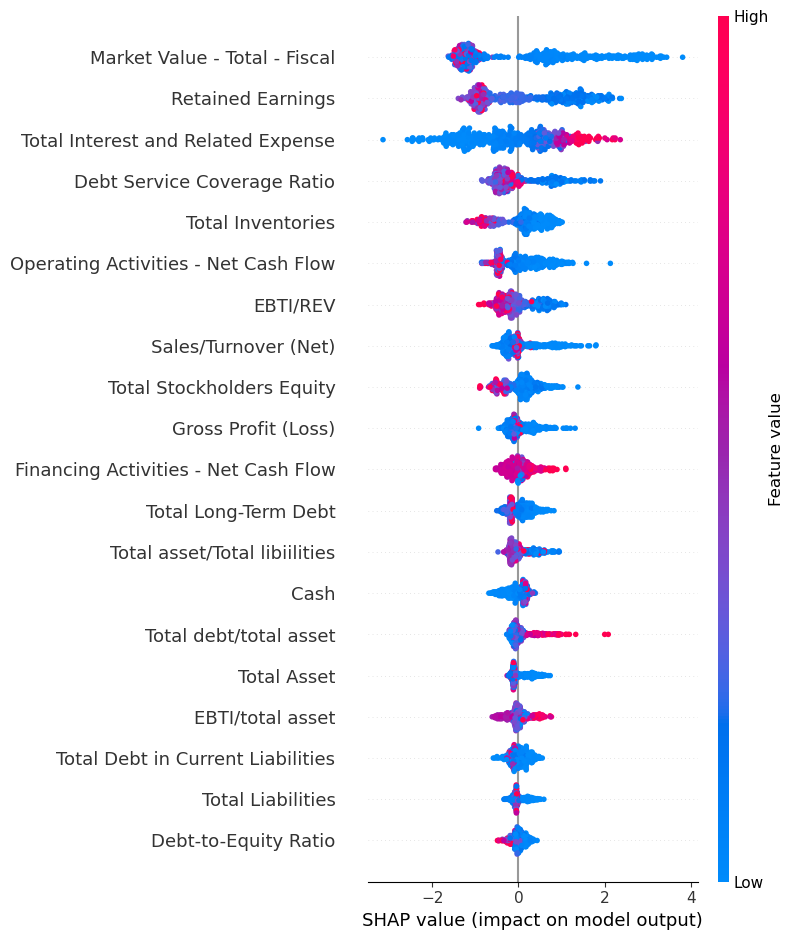

In [48]:
#Generate SHAP Summary Plot 
def generate_shap_summary_plot():
    # Ensure X_test is a Pandas DataFrame
    if isinstance(X_test, np.ndarray):
        X_test_df = pd.DataFrame(X_test, columns=model.get_booster().feature_names)
    elif isinstance(X_test, pd.DataFrame):
        X_test_df = X_test
    else:
        raise TypeError("X_test must be a Pandas DataFrame or NumPy array.")

    # Select SHAP values for a specific class (e.g., class 0)
    shap_values_for_class = shap_values[..., 0]  # Use class 0 (can be adjusted as needed)

    #Display SHAP summary plot interactivity in  Jupyter Notebook
    shap.summary_plot(shap_values_for_class, X_test_df, show=True)

    #Save the summary plit as an image 
    plt.savefig("shap_summary_plot.png", dpi=300, bbox_inches="tight")
    plt.close()

# Run the function
generate_shap_summary_plot()

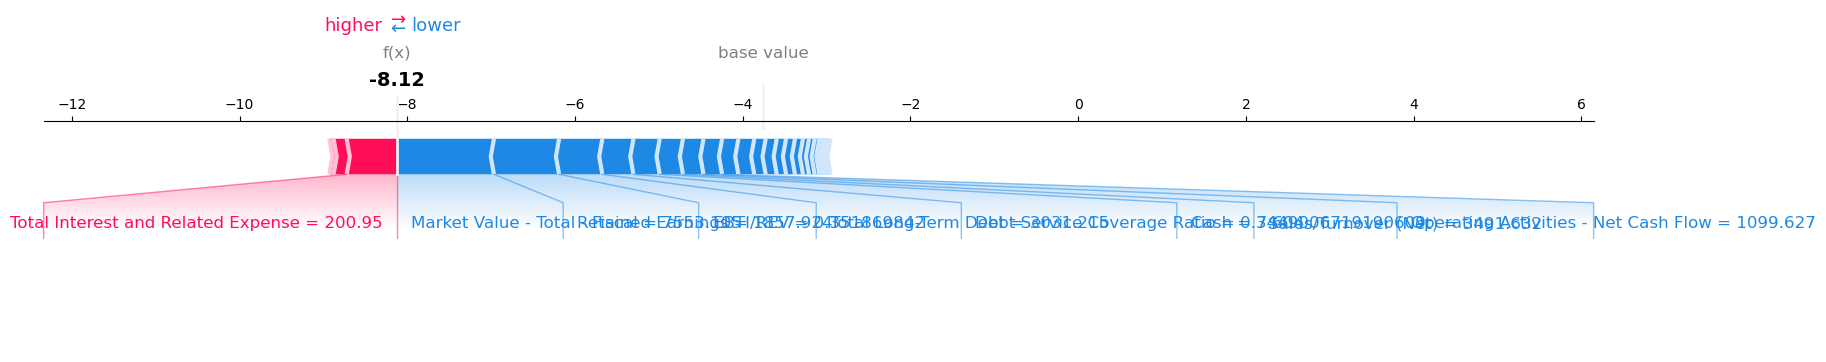

In [49]:
#Generate SHAP Force Plot
import shap

def generate_shap_force_plot():
    # Initialize SHAP JS visualization
    shap.initjs()  

    # Create the Explanation object (working with multi-class SHAP)
    explanation = shap.Explanation(
        values=shap_values[0, :, 0],  # SHAP values for sample 0, class 0
        base_values=explainer.expected_value[0],  # Base value for class 0
        data=X_test.iloc[0],  # Feature values for sample 0
        feature_names=X_test.columns
    )

    # Generate the force plot
    force_plot = shap.force_plot(explanation, matplotlib=True)

    # Save the plot as an image
    plt.savefig("shap_force_plot.png", dpi=300, bbox_inches="tight")
    plt.close()

generate_shap_force_plot()

In [53]:
import os
import shap
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Select SHAP values for the correct class
selected_class_index = 1  # Adjust as needed
shap_values_selected_class = shap_values.values[:, :, selected_class_index]

# Step 2: Define the number of features per plot and create the feature groups
features_per_plot = 3  # Change this value as needed (e.g., 3 features per plot)
feature_groups = [X_test.columns[i:i + features_per_plot] for i in range(0, len(X_test.columns), features_per_plot)]

# Step 3: Create directory to store the plots
os.makedirs("testing_grouped_dependence_plots", exist_ok=True)

# Step 4: Generate the grouped dependence plots
for group_index, feature_group in enumerate(feature_groups):
    plt.figure(figsize=(12, 8))
    colors = plt.cm.get_cmap('tab10', len(feature_group))  # Use a color map for differentiation

    for i, feature in enumerate(feature_group):
        # Adjust index for correct SHAP values (X_test.columns may not match shap_values directly)
        feature_index = X_test.columns.get_loc(feature)
        
        # Scatter plot for each feature
        plt.scatter(
            X_test[feature],  # X-axis: feature values
            shap_values_selected_class[:, feature_index],  # Y-axis: SHAP values
            alpha=0.6,
            label=feature,
            color=colors(i)
        )
    
    # Customize the plot
    plt.title(f"Grouped Dependence Plot - Group {group_index + 1}")
    plt.xlabel("Feature Values")
    plt.ylabel("SHAP Values")
    plt.legend()
    
    # Save the plot
    plt.savefig(f"testing_grouped_dependence_plots/group_{group_index + 1}.png", dpi=300)
    plt.close()

C:\Users\Charenya\AppData\Local\Temp\ipykernel_20276\304152602.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(feature_group))  # Use a color map for differentiation


In [54]:
#for testing purposes
print("SHAP values shape:", shap_values.values.shape)
print(shap_values_selected_class)

SHAP values shape: (517, 26, 3)
[[ 0.36182134  1.58762459  0.52737683 ...  0.00434851  0.22510529
   0.10521241]
 [ 0.26120409 -0.19482583  0.14618619 ...  0.04349754  0.58282095
   0.02054977]
 [ 0.08753538 -0.36075947  0.28038185 ... -0.15336177 -0.33381046
   0.12359031]
 ...
 [-0.65706098  0.12019848 -0.13920094 ...  0.13399773 -0.07673211
   0.02588918]
 [-0.84057646  0.1021653  -0.16401647 ...  0.13701088  0.28165951
   0.03357604]
 [-0.71716084 -0.40581848 -0.19305564 ... -0.0398296  -0.12917991
   0.03982497]]
